<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-исследования" data-toc-modified-id="Обзор-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор исследования</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li><li><span><a href="#Исправление-ошибок" data-toc-modified-id="Исправление-ошибок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исправление ошибок</a></span></li><li><span><a href="#Проверка-на-наличие-дубликатов" data-toc-modified-id="Проверка-на-наличие-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на наличие дубликатов</a></span></li><li><span><a href="#Расчет-дополнительных-полей" data-toc-modified-id="Расчет-дополнительных-полей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расчет дополнительных полей</a></span><ul class="toc-item"><li><span><a href="#Добавим-в-таблицы-столбец-с-номером-Месяца" data-toc-modified-id="Добавим-в-таблицы-столбец-с-номером-Месяца-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Добавим в таблицы столбец с номером Месяца</a></span></li><li><span><a href="#Округлим-минуты-и-объем-интернет-трафика" data-toc-modified-id="Округлим-минуты-и-объем-интернет-трафика-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Округлим минуты и объем интернет трафика</a></span></li><li><span><a href="#Агрегация-данных" data-toc-modified-id="Агрегация-данных-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Агрегация данных</a></span></li><li><span><a href="#Расчет-выручки" data-toc-modified-id="Расчет-выручки-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Расчет выручки</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

##  Обзор исследования

Заказчик исследования «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов:**

**Тариф «Смарт»**
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:<br>
    минута разговора: 3 рубля<br>
    сообщение: 3 рубля<br>
* 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:<br>
    минута разговора: 1 рубль<br>
    сообщение: 1 рубль<br>
* 1 Гб интернет-трафика: 150 рублей

**Примечание**

* «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 

* Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

* Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 

* Неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.


## Исследование данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

Путь к файлам:
* /datasets/calls.csv
* /datasets/internet.csv
* /datasets/messages.csv
* /datasets/tariffs.csv
* /datasets/users.csv

In [2]:
try:
    df_calls = pd.read_csv('/datasets/calls.csv')
    df_internet = pd.read_csv('/datasets/internet.csv')
    df_messages = pd.read_csv('/datasets/messages.csv')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv')
    df_users = pd.read_csv('/datasets/users.csv')
except:
    print('При чтение файлов в датафрейм возникли ошибки')

**Таблица `calls` (информация о звонках):** 
* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица `internet` (информация об интернет-сессиях):**
* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

**Таблица `messages` (информация о сообщениях):**
* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица `tariffs` (информация о тарифах):**
* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Таблица users (информация о пользователях):**
* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tariff` — название тарифного плана

## Подготовка данных

### Приведение данных к нужным типам

Приведем поля, содержащие дату, к в формату даты.

In [3]:
df_calls['call_date'] = pd.to_datetime(
    df_calls['call_date'], format='%Y-%m-%d')

df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%d')

df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%d')

df_users['reg_date'] = pd.to_datetime(
    df_users['reg_date'], format='%Y-%m-%d')

df_users['churn_date'] = pd.to_datetime(
    df_users['churn_date'], format='%Y-%m-%d')

### Исправление ошибок

В таблице `internet` удалим колонку `Unnamed: 0`

In [4]:
df_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
df_internet.pop('Unnamed: 0')

0              0
1              1
2              2
3              3
4              4
           ...  
149391    149391
149392    149392
149393    149393
149394    149394
149395    149395
Name: Unnamed: 0, Length: 149396, dtype: int64

In [6]:
df_internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


### Проверка на наличие дубликатов

In [ ]:
df_calls.duplicated().sum()

0

In [8]:
df_messages.duplicated().sum()

0

In [9]:
df_internet.duplicated().sum()

0

In [10]:
df_users.duplicated().sum()

0

Дубликатов нет

### Расчет дополнительных полей

#### Добавим в таблицы столбец с номером Месяца

In [ ]:
df_calls['call_date_m'] = df_calls['call_date'].dt.month

df_internet['session_date_m'] = df_internet['session_date'].dt.month

df_messages['message_date_m'] = df_messages['message_date'].dt.month

df_users['reg_date_m'] = df_users['reg_date'].dt.month

df_users['churn_date_m'] = df_users['churn_date'].dt.month

####  Округлим минуты и объем интернет трафика

1. Округлим минуты:

In [12]:
df_calls['duration_rnd'] = df_calls['duration'].apply(np.ceil)
# без apply
# df_calls['duration_rnd'] = np.ceil(df_calls['duration'])


In [13]:
df_calls

,id,call_date,duration,user_id,call_date_m,duration_rnd
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.0
202603,1499_216,2018-10-18,18.83,1499,10,19.0
202604,1499_217,2018-11-10,10.81,1499,11,11.0
202605,1499_218,2018-10-06,4.27,1499,10,5.0


In [14]:
df_internet

,id,mb_used,session_date,user_id,session_date_m
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


2. Округлим интернет траффик

In [15]:
df_internet_grouped = (df_internet.groupby(['user_id','session_date_m'])['mb_used'].sum() / 1024).apply(np.ceil).reset_index()
df_internet_grouped

,user_id,session_date_m,mb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


In [16]:
df_internet_grouped = df_internet_grouped.rename(columns={'session_date_m': 'month', 'mb_used': 'gb_used'})
df_internet_grouped

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
...,...,...,...
3198,1498,10,21.0
3199,1499,9,2.0
3200,1499,10,18.0
3201,1499,11,18.0


####  Агрегация данных

Для каждого клиента в разрезе месяцов определим:
* количество и длительность звонков
* количество сообщений
* объем интернет трафика

In [17]:
df_calls_grouped = df_calls[df_calls['duration'] > 0].groupby(['user_id','call_date_m'])['duration_rnd'].agg({'count', 'sum'}).reset_index()
df_calls_grouped

,user_id,call_date_m,count,sum
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0
...,...,...,...,...
3163,1498,10,30,247.0
3164,1499,9,8,70.0
3165,1499,10,44,449.0
3166,1499,11,62,612.0


In [18]:
df_calls_grouped = df_calls_grouped.rename(columns={'sum': 'call_sum', 'count': 'call_count', 'call_date_m': 'month'})
df_calls_grouped

,user_id,month,call_count,call_sum
0,1000,5,17,159.0
1,1000,6,28,172.0
2,1000,7,41,340.0
3,1000,8,42,408.0
4,1000,9,46,466.0
...,...,...,...,...
3163,1498,10,30,247.0
3164,1499,9,8,70.0
3165,1499,10,44,449.0
3166,1499,11,62,612.0


In [19]:
df_messages_grouped = df_messages.groupby(['user_id','message_date_m'])['id'].count().reset_index()
df_messages_grouped

,user_id,message_date_m,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [20]:
df_messages_grouped = df_messages_grouped.rename(columns={'id': 'message_count', 'message_date_m': 'month'})
df_messages_grouped

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Объеденим сгруппированные данные по звонкам, сообщениям и интернет трафику в одну таблицу.

In [21]:
df_calls_messages = df_calls_grouped.join(df_messages_grouped.set_index(['user_id','month']), on=['user_id','month'], how='outer')
df_calls_messages

,user_id,month,call_count,call_sum,message_count
0,1000,5,17.0,159.0,22.0
1,1000,6,28.0,172.0,60.0
2,1000,7,41.0,340.0,75.0
3,1000,8,42.0,408.0,81.0
4,1000,9,46.0,466.0,57.0
...,...,...,...,...,...
3167,1489,8,NaN,NaN,17.0
3167,1489,9,NaN,NaN,32.0
3167,1489,10,NaN,NaN,21.0
3167,1489,11,NaN,NaN,20.0


In [22]:
df_grouped = df_calls_messages.join(df_internet_grouped.set_index(['user_id','month']), on=['user_id','month'], how='outer')

In [23]:
df_grouped = df_grouped.sort_values(by=['user_id','month'], ascending=True)
df_grouped = df_grouped.fillna(0)
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used
0,1000,5,17.0,159.0,22.0,3.0
1,1000,6,28.0,172.0,60.0,23.0
2,1000,7,41.0,340.0,75.0,14.0
3,1000,8,42.0,408.0,81.0,14.0
4,1000,9,46.0,466.0,57.0,15.0
...,...,...,...,...,...,...
3163,1498,10,30.0,247.0,42.0,21.0
3164,1499,9,8.0,70.0,11.0,2.0
3165,1499,10,44.0,449.0,48.0,18.0
3166,1499,11,62.0,612.0,59.0,18.0


Проверим корректность объединения таблиц.

In [24]:
df_grouped[['call_sum', 'message_count','gb_used']].sum()

call_sum         1450301.0
message_count     123036.0
gb_used            55599.0
dtype: float64

In [25]:
df_calls_grouped['call_sum'].sum()

1450301.0

In [26]:
df_messages_grouped['message_count'].sum()

123036

In [27]:
df_internet_grouped['gb_used'].sum()

55599.0

#### Расчет выручки

Добавим в сгруппированную таблицу параметры тарифов

In [28]:
df_grouped = df_grouped.merge(df_users[['user_id','tariff']], on='user_id', how='left')
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff
0,1000,5,17.0,159.0,22.0,3.0,ultra
1,1000,6,28.0,172.0,60.0,23.0,ultra
2,1000,7,41.0,340.0,75.0,14.0,ultra
3,1000,8,42.0,408.0,81.0,14.0,ultra
4,1000,9,46.0,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart
3210,1499,9,8.0,70.0,11.0,2.0,smart
3211,1499,10,44.0,449.0,48.0,18.0,smart
3212,1499,11,62.0,612.0,59.0,18.0,smart


In [29]:
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
df_grouped = df_grouped.merge(df_tariffs, on='tariff', how='left')
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart,50,15360,500,550,200,3,3
3210,1499,9,8.0,70.0,11.0,2.0,smart,50,15360,500,550,200,3,3
3211,1499,10,44.0,449.0,48.0,18.0,smart,50,15360,500,550,200,3,3
3212,1499,11,62.0,612.0,59.0,18.0,smart,50,15360,500,550,200,3,3


Рассчитаем доход от СМС

In [31]:
df_grouped['message_profit'] = (df_grouped['message_count'] - df_grouped['messages_included']) * df_grouped['rub_per_message']
df_grouped.loc[df_grouped['message_profit'] < 0,'message_profit'] = 0
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,message_profit
0,1000,5,17.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0
1,1000,6,28.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0
2,1000,7,41.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0
3,1000,8,42.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0
4,1000,9,46.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart,50,15360,500,550,200,3,3,0.0
3210,1499,9,8.0,70.0,11.0,2.0,smart,50,15360,500,550,200,3,3,0.0
3211,1499,10,44.0,449.0,48.0,18.0,smart,50,15360,500,550,200,3,3,0.0
3212,1499,11,62.0,612.0,59.0,18.0,smart,50,15360,500,550,200,3,3,27.0


Расчитаем доход от интернет трафика

In [32]:
df_grouped['internet_profit'] = (df_grouped['gb_used'] - df_grouped['mb_per_month_included'] / 1024) * df_grouped['rub_per_gb']
df_grouped.loc[df_grouped['internet_profit'] < 0,'internet_profit'] = 0
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,message_profit,internet_profit
0,1000,5,17.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
1,1000,6,28.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
2,1000,7,41.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
3,1000,8,42.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
4,1000,9,46.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart,50,15360,500,550,200,3,3,0.0,1200.0
3210,1499,9,8.0,70.0,11.0,2.0,smart,50,15360,500,550,200,3,3,0.0,0.0
3211,1499,10,44.0,449.0,48.0,18.0,smart,50,15360,500,550,200,3,3,0.0,600.0
3212,1499,11,62.0,612.0,59.0,18.0,smart,50,15360,500,550,200,3,3,27.0,600.0


Расчитаем доход от звонков

In [33]:
df_grouped['calls_profit'] = (df_grouped['call_sum'] - df_grouped['minutes_included']) * df_grouped['rub_per_minute']
df_grouped.loc[df_grouped['calls_profit'] < 0,'calls_profit'] = 0
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,message_profit,internet_profit,calls_profit
0,1000,5,17.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,6,28.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,7,41.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,8,42.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,9,46.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart,50,15360,500,550,200,3,3,0.0,1200.0,0.0
3210,1499,9,8.0,70.0,11.0,2.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0
3211,1499,10,44.0,449.0,48.0,18.0,smart,50,15360,500,550,200,3,3,0.0,600.0,0.0
3212,1499,11,62.0,612.0,59.0,18.0,smart,50,15360,500,550,200,3,3,27.0,600.0,336.0


In [34]:
df_grouped['profit'] = df_grouped['rub_monthly_fee'] +  df_grouped['message_profit'] + df_grouped['internet_profit'] + df_grouped['calls_profit']
df_grouped.reset_index(drop=True)
df_grouped

,user_id,month,call_count,call_sum,message_count,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,message_profit,internet_profit,calls_profit,profit
0,1000,5,17.0,159.0,22.0,3.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,28.0,172.0,60.0,23.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,41.0,340.0,75.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,42.0,408.0,81.0,14.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,46.0,466.0,57.0,15.0,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,30.0,247.0,42.0,21.0,smart,50,15360,500,550,200,3,3,0.0,1200.0,0.0,1750.0
3210,1499,9,8.0,70.0,11.0,2.0,smart,50,15360,500,550,200,3,3,0.0,0.0,0.0,550.0
3211,1499,10,44.0,449.0,48.0,18.0,smart,50,15360,500,550,200,3,3,0.0,600.0,0.0,1150.0
3212,1499,11,62.0,612.0,59.0,18.0,smart,50,15360,500,550,200,3,3,27.0,600.0,336.0,1513.0


## Анализ данных

**Проанализируем звонки**

Определим среднее, медиану  и стандартное отклонение

In [35]:
smart_calls = df_grouped[df_grouped['tariff'] == 'smart']['call_sum']
ultra_calls = df_grouped[df_grouped['tariff'] == 'ultra']['call_sum']

In [36]:
smart_calls.describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: call_sum, dtype: float64

In [37]:
ultra_calls.describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: call_sum, dtype: float64

Построим гистограмы

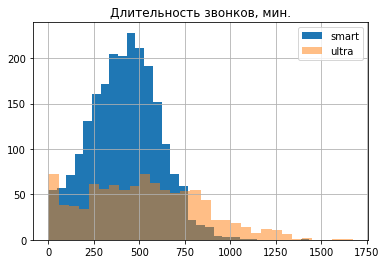

In [69]:
smart_calls.hist(bins=30, label='smart')
ultra_calls.hist(bins=30, alpha=0.5, label='ultra')
plt.legend()
plt.title('Длительность звонков, мин.')
plt.show()

Посчитаем дисперсию

In [39]:
np.var(smart_calls)

36203.06665209469

In [40]:
np.var(ultra_calls)

100771.2236172022

**Вывод: Звонки**<br>
Распределение продолжительности звонков для тарифа smart скошено влево (среднее меньше медианы)
Распределение продолжительности звонков для тарифа ultra скошено вправо (среднее больше медианы)
Разброс значений для smart меньше чем для ultra (стандартное отклонение для smart  < стандартного отклонения для ultra).
Клиенты тарифов smart чаще превышаю количество минут, заложенные тарифом

In [41]:
df_grouped.pivot_table(index='tariff', values=['call_count', 'call_sum', 'message_count', 'gb_used','profit'],aggfunc=['mean', 'median','std', 'var'])

mean                                                    \
       call_count    call_sum    gb_used message_count       profit   
tariff                                                                
smart   46.947510  417.934948  16.328847     33.384029  1289.973531   
ultra   59.236548  526.623350  19.494416     49.363452  2070.152284   

           median                                               std  \
       call_count call_sum gb_used message_count  profit call_count   
tariff                                                                
smart        47.0    422.0    17.0          28.0  1023.0  21.039171   
ultra        58.0    518.0    19.0          38.0  1950.0  35.562722   

                                                                var  \
          call_sum   gb_used message_count      profit   call_count   
tariff                                                                
smart   190.313730  5.747061     28.227876  818.404367   442.646705   
ultra   317.606098  9.853511     47.804457  376.187114  1264.707199   

                                                               
             call_sum    gb_used message_count         profit  
tariff                                                         
smart    36219.315784  33.028705    796.812958  669785.708006  
ultra   100873.633397  97.091686   2285.266143  141516.745079

**Проанализруем сообщения**

Определим среднее, медиану  и стандартное отклонение

In [42]:
smart_msgs = df_grouped[df_grouped['tariff'] == 'smart']['message_count']
ultra_msgs = df_grouped[df_grouped['tariff'] == 'ultra']['message_count']

In [43]:
smart_msgs.describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_count, dtype: float64

In [44]:
ultra_msgs.describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_count, dtype: float64

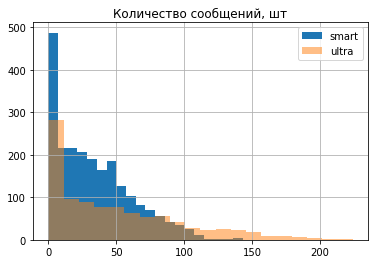

In [45]:
smart_msgs.hist(bins=20, label='smart')
ultra_msgs.hist(bins=20, alpha=0.5, label='ultra')
plt.legend()
plt.title('Количество сообщений, шт')
plt.show()


Посчитаем дисперсию

In [46]:
np.var(smart_msgs)

796.455482917076

In [47]:
np.var(ultra_msgs)

2282.9460753948824

**Вывод: Сообщения**<br>
Распределение количества сообщений для тарифов smart и ultra скошено вправо (среднее больше медианы)
Разброс значений для smart меньше чем для ultra (стандартное отклонение для smart  < стандартного отклонения для ultra).
Пользователи тарифов smart чаще превышаю количество сообщений, предусмотренных тарифом, чем пользователи тарифа ultra

**Проанализруем объем интернет трафика**

Определим среднее, медиану и стандартное отклонение

In [48]:
smart_internet = df_grouped[df_grouped['tariff'] == 'smart']['gb_used']
ultra_internet = df_grouped[df_grouped['tariff'] == 'ultra']['gb_used']

In [49]:
smart_internet.describe()

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

In [50]:
ultra_internet.describe()

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

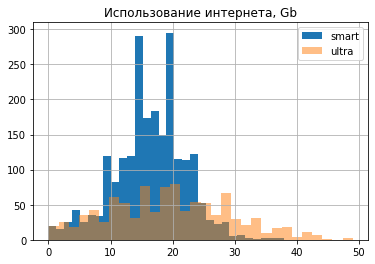

In [51]:
smart_internet.hist(bins=30, label='smart')
ultra_internet.hist(bins=30, alpha=0.5, label='ultra')
plt.legend()
plt.title('Использование интернета, Gb')
plt.show()

Посчитаем дисперсию

In [52]:
np.var(smart_internet)

33.013887454837445

In [53]:
np.var(ultra_internet)

96.99311602978692

**Вывод: Интернет трафик**<br>
Распределение объемаиспользуемого трафика практически не скошено (среднее совпадает с медианой)
Разброс значений для smart меньше чем для ultra (стандартное отклонение для smart  < стандартного отклонения для ultra).
Пользователи тарифа smart, чаще превышают объем интернета, предусмотренный тарифами, чем пользователи тарифа ultra.

**Проанализруем выручку**

In [54]:
smart_profit = df_grouped[df_grouped['tariff'] == 'smart'].groupby('user_id')['profit'].sum()
ultra_profit = df_grouped[df_grouped['tariff'] == 'ultra'].groupby('user_id')['profit'].sum()

In [55]:
smart_profit.describe()

count      350.000000
mean      8215.288571
std       5404.259451
min        550.000000
25%       4191.250000
50%       7259.500000
75%      11199.500000
max      28351.000000
Name: profit, dtype: float64

In [56]:
ultra_profit.describe()

count      148.000000
mean     13777.702703
std       6867.299729
min       1950.000000
25%       7800.000000
50%      13725.000000
75%      19500.000000
max      32400.000000
Name: profit, dtype: float64

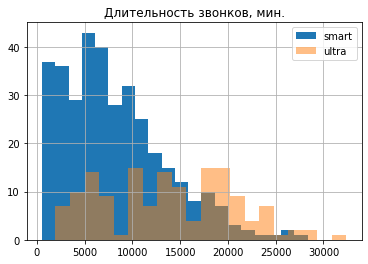

In [57]:
smart_profit.hist(bins=20, label='smart')
ultra_profit.hist(bins=20, alpha=0.5, label='ultra')
plt.legend()
plt.title('Длительность звонков, мин.')
plt.show()

Медианное и среднее значение дохода у тарифа ultra, больше чем у тарифа smart

In [58]:
df_users_grouped = df_grouped.groupby('user_id')[['call_sum','message_count', 'gb_used']].sum()
df_users_grouped

,call_sum,message_count,gb_used
user_id,,,
1000,2566.0,496.0,109.0
1001,844.0,0.0,32.0
1002,1517.0,70.0,117.0
1003,3822.0,380.0,59.0
1004,987.0,1192.0,150.0
...,...,...,...
1495,3920.0,340.0,127.0
1496,5984.0,468.0,270.0
1497,1406.0,51.0,46.0


Процент пользователей, которые исользуют звонки:

In [59]:
len(df_users_grouped[df_users_grouped['call_sum'] > 0]) / len(df_users_grouped)

0.9879518072289156

Процент пользователей, которые исользуют интернет:

In [60]:
len(df_users_grouped[df_users_grouped['gb_used'] > 0]) / len(df_users_grouped)

0.9979919678714859

Процент пользователей, которые исользуют сообщения:

In [61]:
len(df_users_grouped[df_users_grouped['message_count'] > 0]) / len(df_users_grouped)

0.8554216867469879

Меньше всего пользуются смс-сообщениями.

## Проверка гипотез

**Проверим, гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадает**

In [62]:
smart_profit = df_grouped[df_grouped['tariff'] == 'smart'].groupby('user_id')['profit'].sum()

In [63]:
ultra_profit = df_grouped[df_grouped['tariff'] == 'ultra'].groupby('user_id')['profit'].sum()

In [64]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    smart_profit, 
    ultra_profit,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 4.1988922393814165e-16
Отвергаем нулевую гипотезу


Т.к. p-значение ниже статистической значимости, то нулевую гипотезу отвергаем, получается, что средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются.

**Проверим гипотезу: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.**

Нулевая гипотеза: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. <br>
Альтернативаня гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [65]:
df_grouped = df_grouped.merge(df_users[['user_id','city']], on='user_id', how='left')

In [66]:
moscow = df_grouped[df_grouped['city'] == 'Москва']['profit']

In [67]:
other_city = df_grouped[df_grouped['city'] != 'Москва']['profit']

In [68]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    moscow, 
    other_city,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Т.к. p-значение больше статистической значимости, то нулевую гипотезу не получилось отвергнуть, получается, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Вывод

Cредняя выручка клиентов с тарифом smart и ultra различается (1300 и 2100 соответсвенно).<br>

Пользователи тарифов smart чаще используют минуты, сообщения и интернет, сверх предусмотренного тарифом, чем пользователи тарифа ultra: при абонентской плате 500 рублей, клиенты в среднем переплаичивают 800 рублей за превышение лимитов.

Выручка тарифа ultra больше выручки тарифа ultra, но для того чтобы оценить какой из тарифов в целом более выгодный нам не хватает информации о том, каким тарифом пользуются чаще - доля клиентов, пользующихся тарифом ultra, от общего числа клиентов, может оказаться недостаточно большой, в этом случае из-за популярности тарифа smart, тариф smart может оказаться более выгодным.  